In [6]:
import pandas as pd 

In [7]:
jaguar_data_normalized = pd.read_excel('jaguar_data_normalized.xlsx')

In [8]:
jaguar_data_normalized = jaguar_data_normalized.drop(['Unnamed: 0'],axis=1)

# Import necessary libraries

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint
import matplotlib.pyplot as plt

# Section 1: Data Preparation


## 1- Prepare the labels and feature data

In [10]:
labels = jaguar_data_normalized['Efficiency in %'].values

In [11]:
# Split data into train and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(jaguar_data_normalized, labels, test_size=0.2, random_state=42)

# Section 2: RandomForest Training and Evaluation

## Initialize and train a basic RandomForestRegressor model

In [59]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f"RandomForest - MSE: {mse}, R-squared: {r2}")
print("Actual values:", y_test)
print("Predicted values:", predictions)

RandomForest - MSE: 0.001906723910521157, R-squared: 0.8595247479225545
Actual values: [0.70411985 0.96629213 0.79775281 0.74157303 0.82397004 1.
 0.6741573 ]
Predicted values: [0.72799625 0.9317191  0.80626966 0.71602996 0.81202247 0.89650936
 0.67224719]


# Section 3: Hyperparameter Tuning with GridSearchCV

In [7]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the tuned model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"GridSearchCV - Best Params: {grid_search.best_params_}, MSE: {mse}, R-squared: {r2}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
GridSearchCV - Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, MSE: 0.0021127266178111543, R-squared: 0.8443477828278603


# Section 4: Hyperparameter Tuning with RandomizedSearchCV

In [8]:
# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
}

# Initialize RandomizedSearchCV with RandomForestRegressor
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Use the best model from RandomizedSearchCV
best_model_random = random_search.best_estimator_
predictions_random = best_model_random.predict(X_test)

# Evaluate the tuned model
mse_random = mean_squared_error(y_test, predictions_random)
r2_random = r2_score(y_test, predictions_random)
print(f"RandomizedSearchCV - Best Params: {random_search.best_params_} \n MSE: {mse_random} \n R-squared: {r2_random}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RandomizedSearchCV - Best Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 196} 
 MSE: 0.0018621175927699767 
 R-squared: 0.8628110568085805


# Section 5: Plotting Results (Train vs Validation Error)

In [9]:
# Predict on the train and test sets
train_predictions = best_model_random.predict(X_train)
test_predictions = best_model_random.predict(X_test)

# Calculate MSE for both train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

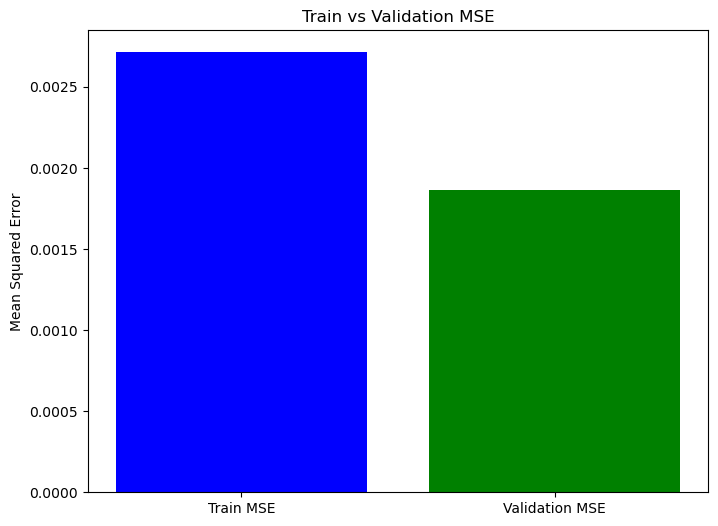

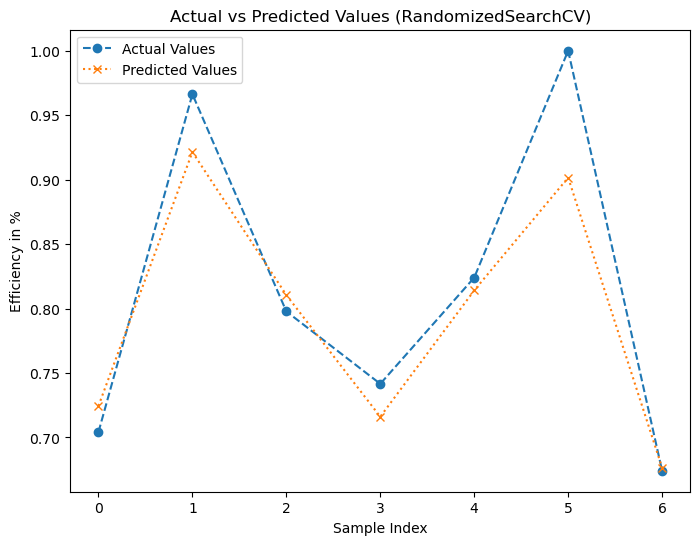

Actual values: [0.70411985 0.96629213 0.79775281 0.74157303 0.82397004 1.
 0.6741573 ]
Predicted values: [0.72443247 0.92141137 0.81046778 0.71605328 0.81403157 0.90155928
 0.67653634]


In [10]:
# Plot MSE for training and test sets
plt.figure(figsize=(8, 6))
plt.bar(['Train MSE', 'Validation MSE'], [train_mse, test_mse], color=['blue', 'green'])
plt.title('Train vs Validation MSE')
plt.ylabel('Mean Squared Error')
plt.show()

# Plot actual vs predicted values for the test set
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual Values', marker='o', linestyle='dashed')
plt.plot(test_predictions, label='Predicted Values', marker='x', linestyle='dotted')
plt.xlabel('Sample Index')
plt.ylabel('Efficiency in %')
plt.title('Actual vs Predicted Values (RandomizedSearchCV)')
plt.legend()
plt.show()

# Print actual vs predicted values
print("Actual values:", y_test)
print("Predicted values:", test_predictions)


# Import necessary libraries

In [11]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Section 2: Model Training (XGBoost and Gradient Boosting)

In [12]:
# Step 1: Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(jaguar_data_normalized, labels, test_size=0.2, random_state=42)


# Step 2: Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 3: Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200,
                          random_state=42)

# Section 3: Model Evaluation (Metrics for Both Models)

In [13]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    explained_variance = explained_variance_score(y_true, y_pred)
    
    print(f"--- {name} ---")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse)}")
    print(f"R-squared (R²): {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    print("\n")

In [14]:
# Step 4: Evaluate XGBoost and Gradient Boosting Regressor
xgb_predictions = xgb_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

# Evaluate XGBoost
evaluate_model("XGBoost", y_test, xgb_predictions)

# Evaluate Gradient Boosting Regressor
evaluate_model("Gradient Boosting", y_test, gbr_predictions)

--- XGBoost ---
Mean Absolute Error (MAE): 0.024680692796212305
Mean Squared Error (MSE): 0.0015373962656362137
Root Mean Squared Error (RMSE): 0.03920964505878896
R-squared (R²): 0.8867344523417965
Explained Variance Score: 0.914542805112286


--- Gradient Boosting ---
Mean Absolute Error (MAE): 0.030754430120777578
Mean Squared Error (MSE): 0.002839040450086082
Root Mean Squared Error (RMSE): 0.05328264680068063
R-squared (R²): 0.7908376138342441
Explained Variance Score: 0.8111685572355901




# Section 4: Plotting Actual vs Predicted Values

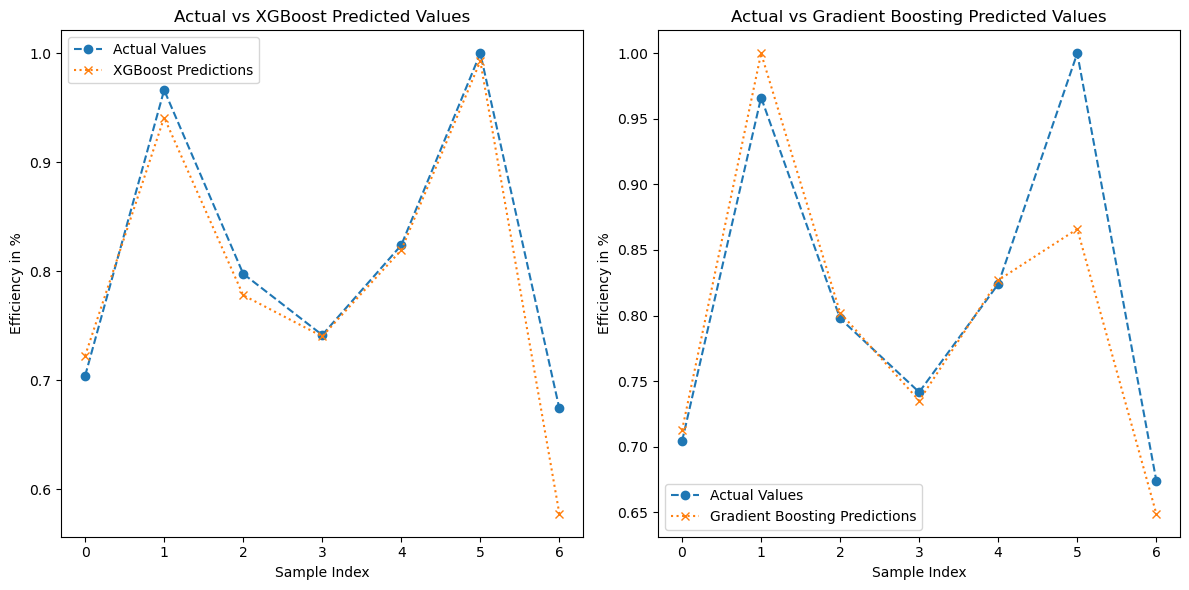

In [15]:
# Step 5: Plot actual vs predicted values for both models
plt.figure(figsize=(12, 6))

# Plot for XGBoost
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual Values', marker='o', linestyle='dashed')
plt.plot(xgb_predictions, label='XGBoost Predictions', marker='x', linestyle='dotted')
plt.xlabel('Sample Index')
plt.ylabel('Efficiency in %')
plt.title('Actual vs XGBoost Predicted Values')
plt.legend()

# Plot for Gradient Boosting
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Actual Values', marker='o', linestyle='dashed')
plt.plot(gbr_predictions, label='Gradient Boosting Predictions', marker='x', linestyle='dotted')
plt.xlabel('Sample Index')
plt.ylabel('Efficiency in %')
plt.title('Actual vs Gradient Boosting Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()




In [16]:
# Step 7: Train XGBoost with evaluation during training
print("Training XGBoost...")

# Pass eval_metric directly into the XGBRegressor constructor
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42, eval_metric=["rmse", "mae"])
eval_set = [(X_train, y_train), (X_test, y_test)]

# Now call fit with eval_set for evaluation
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)




Training XGBoost...
[0]	validation_0-rmse:0.18467	validation_0-mae:0.11105	validation_1-rmse:0.11373	validation_1-mae:0.09191
[1]	validation_0-rmse:0.17938	validation_0-mae:0.10690	validation_1-rmse:0.11011	validation_1-mae:0.08885
[2]	validation_0-rmse:0.17426	validation_0-mae:0.10292	validation_1-rmse:0.10665	validation_1-mae:0.08592
[3]	validation_0-rmse:0.16932	validation_0-mae:0.09911	validation_1-rmse:0.10337	validation_1-mae:0.08320
[4]	validation_0-rmse:0.16454	validation_0-mae:0.09548	validation_1-rmse:0.10022	validation_1-mae:0.08058
[5]	validation_0-rmse:0.15992	validation_0-mae:0.09203	validation_1-rmse:0.09710	validation_1-mae:0.07796
[6]	validation_0-rmse:0.15545	validation_0-mae:0.08870	validation_1-rmse:0.09413	validation_1-mae:0.07544
[7]	validation_0-rmse:0.15112	validation_0-mae:0.08551	validation_1-rmse:0.09128	validation_1-mae:0.07302
[8]	validation_0-rmse:0.14694	validation_0-mae:0.08244	validation_1-rmse:0.08857	validation_1-mae:0.07070
[9]	validation_0-rmse:0.14

[77]	validation_0-rmse:0.02433	validation_0-mae:0.00942	validation_1-rmse:0.03388	validation_1-mae:0.02639
[78]	validation_0-rmse:0.02372	validation_0-mae:0.00916	validation_1-rmse:0.03394	validation_1-mae:0.02635
[79]	validation_0-rmse:0.02312	validation_0-mae:0.00890	validation_1-rmse:0.03399	validation_1-mae:0.02632
[80]	validation_0-rmse:0.02254	validation_0-mae:0.00865	validation_1-rmse:0.03405	validation_1-mae:0.02627
[81]	validation_0-rmse:0.02198	validation_0-mae:0.00841	validation_1-rmse:0.03412	validation_1-mae:0.02623
[82]	validation_0-rmse:0.02143	validation_0-mae:0.00817	validation_1-rmse:0.03418	validation_1-mae:0.02618
[83]	validation_0-rmse:0.02089	validation_0-mae:0.00795	validation_1-rmse:0.03424	validation_1-mae:0.02613
[84]	validation_0-rmse:0.02036	validation_0-mae:0.00773	validation_1-rmse:0.03431	validation_1-mae:0.02609
[85]	validation_0-rmse:0.01985	validation_0-mae:0.00752	validation_1-rmse:0.03438	validation_1-mae:0.02605
[86]	validation_0-rmse:0.01935	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse', 'mae'],
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Section 5: Manual Tracking of Errors for Gradient Boosting

In [17]:
# Step 9: Train Gradient Boosting and manually trace the accuracy (unchanged)

# Empty lists to store the training and validation errors for each boosting round
train_errors = []
test_errors = []

# Manually track MSE at each stage of training for Gradient Boosting
for n_estimators in range(1, 201):  # Loop over each number of estimators
    gbr_model.set_params(n_estimators=n_estimators)
    gbr_model.fit(X_train, y_train)

    # Predictions on training set and test set
    train_pred = gbr_model.predict(X_train)
    test_pred = gbr_model.predict(X_test)

    # Calculate Mean Squared Error for both train and test sets
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    # Append errors to trace
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Print the progress (every 50 iterations for brevity)
    if n_estimators % 50 == 0:
        print(f"Gradient Boosting n_estimators={n_estimators}, Train MSE={train_mse:.4f}, Test MSE={test_mse:.4f}")




Gradient Boosting n_estimators=50, Train MSE=0.0002, Test MSE=0.0028
Gradient Boosting n_estimators=100, Train MSE=0.0000, Test MSE=0.0028
Gradient Boosting n_estimators=150, Train MSE=0.0000, Test MSE=0.0028
Gradient Boosting n_estimators=200, Train MSE=0.0000, Test MSE=0.0028


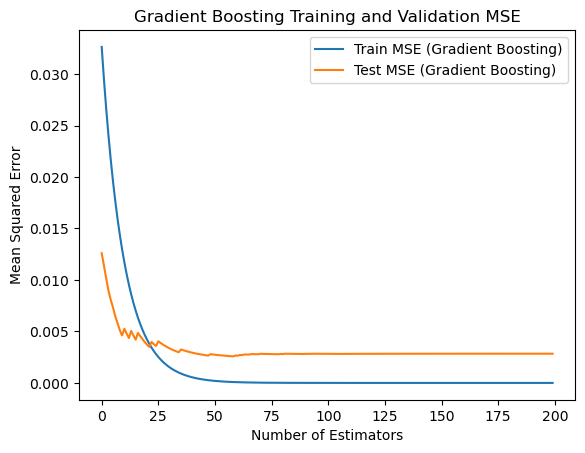

In [18]:
# Step 10: Plotting training and test error for Gradient Boosting
plt.plot(train_errors, label='Train MSE (Gradient Boosting)')
plt.plot(test_errors, label='Test MSE (Gradient Boosting)')
plt.title('Gradient Boosting Training and Validation MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Section 11: Final Evaluation and Comparison

In [19]:
# Evaluate and print results for XGBoost after training
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost - R2: {xgb_r2}, MSE: {xgb_mse}, MAE: {xgb_mae}")

# Evaluate and print final results for Gradient Boosting
gbr_predictions = gbr_model.predict(X_test)
gbr_r2 = r2_score(y_test, gbr_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
print(f"Gradient Boosting - R2: {gbr_r2}, MSE: {gbr_mse}, MAE: {gbr_mae}")

XGBoost - R2: 0.8867344523417965, MSE: 0.0015373962656362137, MAE: 0.024680692796212305
Gradient Boosting - R2: 0.7908376138342441, MSE: 0.002839040450086082, MAE: 0.030754430120777578


# GPT-2 Model but not succes 

In [12]:
df = pd.read_excel("Dataset Molecules.xlsx")
# Adding the 'Title' column from dataset_molecules to jaguar_data
jaguar_data_normalized['Title'] = df['Title'] 
# Reorder the columns to make 'Title' the first column
columns = ['Title'] + [col for col in jaguar_data_normalized.columns if col != 'Title']
jaguar_data_normalized = jaguar_data_normalized[columns]
jaguar_data_normalized

C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()
C:\Users\OUAZZE\.conda\envs\tp\lib\site-packages\IPython\core\formatters.py:344: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  return method()


,Title,r_j_SCF_Energy_Hartree,r_j_Gas_Phase_Energy_Hartree,r_j_One_Electron_Energy_Hartree,r_j_Two-electron_Energy_Hartree,r_j_Total_Electronic_Energy_Hartree,r_j_Nuclear_Repulsion_Energy_Hartree,r_j_Alpha_HOMO_Energy_Hartree,r_j_Beta_HOMO_Energy_Hartree,r_j_Alpha_LUMO_Energy_Hartree,...,r_j_Dipole_Component_Y_(esp)_Debye,r_j_Dipole_Component_Z_(esp)_Debye,r_j_s2_Spin,r_j_sz2_Spin,r_j_Rotational_constants_of_molecule_0,r_j_Rotational_constants_of_molecule_1,r_j_Rotational_constants_of_molecule_2,i_j_symmetry_number_for_molecule,r_j_HOMO-LUMO_Gap_Hartree,Efficiency in %
0,H02,0.721267,0.721267,0.609212,0.421452,0.628942,0.424676,0.673355,0.673355,0.639610,...,0.783362,0.316197,0,0,0.075911,0.189257,0.184384,0,0.550789,0.700375
1,H04,0.953817,0.953817,0.921560,0.086407,0.926687,0.093915,0.373615,0.373615,0.378246,...,0.399070,0.973247,0,0,0.319860,0.680193,0.542937,0,0.609866,0.928839
2,H06,0.161868,0.161868,0.426689,0.507842,0.384567,0.281201,0.644812,0.644812,0.623672,...,0.824013,0.394767,0,0,0.189752,0.285628,0.274961,0,0.597207,0.895131
3,H08,0.149969,0.149969,0.417338,0.516224,0.374593,0.287654,0.698140,0.698140,0.621555,...,0.801969,0.000000,0,0,0.186772,0.083482,0.117992,0,0.365116,0.913858
4,H09,0.000000,0.000000,0.000000,1.000000,0.000000,0.864346,0.513441,0.513441,0.426282,...,0.849689,0.395197,0,0,0.008288,0.009229,0.000300,0,0.245554,0.928839
5,H11,0.912819,0.912819,0.839758,0.178322,0.851391,0.197614,0.368653,0.368653,0.397778,...,0.445736,0.647275,0,0,0.245668,0.385390,0.373768,0,0.719582,0.728464
6,H12,0.918822,0.918822,0.846267,0.171549,0.857730,0.191758,0.372627,0.372627,0.397139,...,0.496028,0.622801,0,0,0.293544,0.308212,0.311223,0,0.700090,0.898502
7,H13,0.876389,0.876389,0.749412,0.282395,0.769877,0.318833,0.439830,0.439830,0.451700,...,0.533297,0.620215,0,0,0.205768,0.081070,0.120375,0,0.668442,0.805243
8,H14,0.882795,0.882795,0.776981,0.251672,0.795417,0.275213,0.763224,0.763224,0.620012,...,0.901001,0.388563,0,0,0.244093,0.114588,0.141886,0,0.086607,0.823970
9,H15,0.929950,0.929950,0.870823,0.141681,0.878869,0.162215,0.135779,0.135779,0.194348,...,0.000000,1.000000,0,0,0.295702,0.260644,0.270583,0,0.763790,1.000000


In [13]:
jaguar_data_normalized['descriptions'] = ""

In [14]:
for index, row in jaguar_data_normalized.iterrows():
    description = f"""
    Molecule {row['Title']}: 
    This molecule demonstrates a corrosion inhibition efficiency of {row['Efficiency in %']:.10f} percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments. 
    The molecule exhibits an SCF Energy value of {row['r_j_SCF_Energy_Hartree']:.10f} suggesting its energy state 
    and stability during chemical interactions.

    The Gas Phase Energy is measured at {row['r_j_Gas_Phase_Energy_Hartree']:.10f}, providing insight into its behavior 
    in a gaseous environment. Additionally, the One Electron Energy is {row['r_j_One_Electron_Energy_Hartree']:.10f}, 
    which contributes to the overall energy profile of the molecule.

    Furthermore, this molecule has a Two-electron Energy of {row['r_j_Two-electron_Energy_Hartree']:.10f} and a 
    Total Electronic Energy of {row['r_j_Total_Electronic_Energy_Hartree']:.10f}, reflecting the combined effects 
    of electron interactions on its overall stability.

    The Nuclear Repulsion Energy is {row['r_j_Nuclear_Repulsion_Energy_Hartree']:.10f}, indicating the degree of 
    repulsive forces between the nuclei within the molecule. This molecule's HOMO Energy is {row['r_j_Alpha_HOMO_Energy_Hartree']:.10f} 
    and its LUMO Energy is {row['r_j_Alpha_LUMO_Energy_Hartree']:.10f}, which play a crucial role in defining 
    its electronic properties and potential for chemical reactions.

    It also features a Dipole Moment Magnitude of {row['r_j_Dipole_Moment_Magnitude_(qm)_Debye']:.10f}, which could influence 
    its interactions with electric fields or polar solvents. Additionally, the molecule exhibits a HOMO-LUMO gap of 
    {row['r_j_HOMO-LUMO_Gap_Hartree']:.10f}, a key indicator of its electronic stability.

    This molecule is further characterized by its Rotational Constants ({row['r_j_Rotational_constants_of_molecule_0']:.10f}, 
    {row['r_j_Rotational_constants_of_molecule_1']:.10f}, and {row['r_j_Rotational_constants_of_molecule_2']:.10f}), which describe 
    the rotational behavior and structural rigidity of the molecule.
    """

    jaguar_data_normalized.at[index, 'descriptions'] = description    
    print(description)


    Molecule H02: 
    This molecule demonstrates a corrosion inhibition efficiency of 0.7003745318 percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments. 
    The molecule exhibits an SCF Energy value of 0.7212667082 suggesting its energy state 
    and stability during chemical interactions.

    The Gas Phase Energy is measured at 0.7212667082, providing insight into its behavior 
    in a gaseous environment. Additionally, the One Electron Energy is 0.6092123650, 
    which contributes to the overall energy profile of the molecule.

    Furthermore, this molecule has a Two-electron Energy of 0.4214516269 and a 
    Total Electronic Energy of 0.6289415694, reflecting the combined effects 
    of electron interactions on its overall stability.

    The Nuclear Repulsion Energy is 0.4246760739, indicating the degree of 
    repulsive forces between the nuclei within the molecule. This molecule's HOMO Energy is 0.6733548511 
    

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch
from datasets import Dataset
from transformers import Trainer, TrainingArguments

In [17]:
train_texts, test_texts = train_test_split(jaguar_data_normalized['descriptions'].tolist(), test_size=0.2, random_state=42)
train_texts, val_texts = train_test_split(train_texts, test_size=0.125, random_state=42)  # 10% validation

In [22]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2', clean_up_tokenization_spaces=False)
model = GPT2LMHeadModel.from_pretrained('gpt2')

In [23]:
tokenizer.pad_token = tokenizer.eos_token

In [24]:
train_inputs = tokenizer(train_texts, return_tensors='pt', padding=True, truncation=True)
val_inputs = tokenizer(val_texts, return_tensors='pt', padding=True, truncation=True)
test_inputs = tokenizer(test_texts, return_tensors='pt', padding=True, truncation=True)

In [25]:
train_dataset = Dataset.from_dict({
    'input_ids': train_inputs['input_ids'].tolist(),
    'attention_mask': train_inputs['attention_mask'].tolist(),
    'labels': train_inputs['input_ids'].tolist()
})

In [26]:
val_dataset = Dataset.from_dict({
    'input_ids': val_inputs['input_ids'].tolist(),
    'attention_mask': val_inputs['attention_mask'].tolist(),
    'labels': val_inputs['input_ids'].tolist()
})

In [27]:
training_args = TrainingArguments(
    output_dir='../A_A/res2',              # Directory to save outputs
    per_device_train_batch_size=16,      # Optimized batch size for good memory-performance balance
    num_train_epochs=40,                 # Number of epochs to train
    logging_dir='../A_A/log2',             # Directory for log files
    logging_steps=4,                   # Log every 100 steps to avoid frequent slowdowns
    eval_strategy="epoch",               # Evaluate at the end of each epoch
    save_strategy="epoch",               # Save model at the end of each epoch
)

In [28]:
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,        
    eval_dataset=val_dataset             
)

In [29]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,2.574704
2,3.053200,2.245952
3,3.053200,1.942729
4,2.186500,1.708486
5,2.186500,1.450965
6,1.687800,1.275312
7,1.687800,1.140702
8,1.302500,1.015208
9,1.302500,0.958055
10,1.063500,0.902259


TrainOutput(global_step=80, training_loss=0.9923801422119141, metrics={'train_runtime': 7934.3322, 'train_samples_per_second': 0.106, 'train_steps_per_second': 0.01, 'total_flos': 190763596800000.0, 'train_loss': 0.9923801422119141, 'epoch': 40.0})

In [30]:
test_dataset = Dataset.from_dict({
    'input_ids': test_inputs['input_ids'].tolist(),
    'attention_mask': test_inputs['attention_mask'].tolist(),
    'labels': test_inputs['input_ids'].tolist()
})

In [31]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.7250236868858337,
 'eval_runtime': 8.6026,
 'eval_samples_per_second': 0.814,
 'eval_steps_per_second': 0.116,
 'epoch': 40.0}

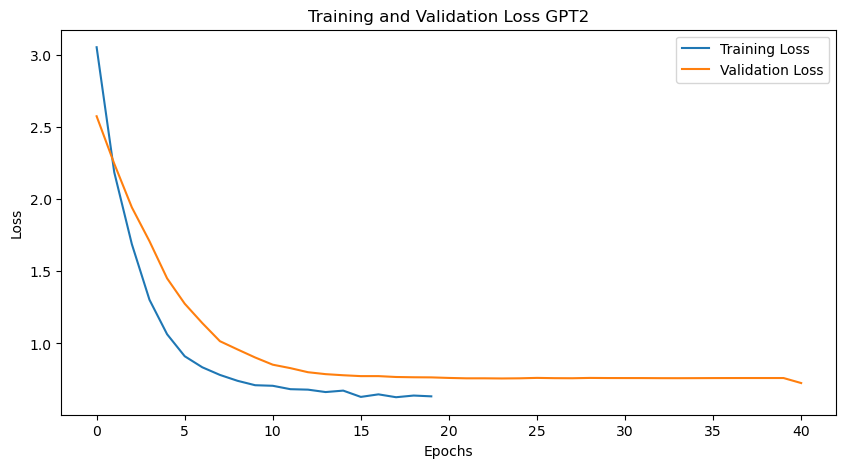

In [32]:
import matplotlib.pyplot as plt

train_loss = []
val_loss = []


for log in trainer.state.log_history:
    if 'loss' in log.keys():
        train_loss.append(log['loss'])
    if 'eval_loss' in log.keys():
        val_loss.append(log['eval_loss'])


plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss GPT2')
plt.legend()
plt.show()

In [33]:
test_results = trainer.evaluate(test_dataset)
test_loss = test_results['eval_loss']
print(f"Test Loss: {test_loss}") 

Test Loss: 0.7250236868858337


In [34]:
predicted_outputs = trainer.predict(test_dataset)
predicted_ids = predicted_outputs.predictions.argmax(-1)  # Get the predicted token ids

# Decode the predicted and actual outputs back into text for comparison
predicted_texts = [tokenizer.decode(pred, skip_special_tokens=True) for pred in predicted_ids]
actual_texts = [tokenizer.decode(label, skip_special_tokens=True) for label in test_dataset['labels']]

In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred_ids, true_ids):
    # Flatten the predicted and true label sequences
    flattened_pred = [token for pred in pred_ids for token in pred]
    flattened_true = [token for true in true_ids for token in true]
    
    # Compute accuracy
    accuracy = accuracy_score(flattened_true, flattened_pred)
    
    # Compute precision, recall, f1-score with zero_division parameter
    precision, recall, f1, _ = precision_recall_fscore_support(
        flattened_true, flattened_pred, average='macro', zero_division=0
    )
    
    return accuracy, precision, recall, f1

# Calculate metrics
accuracy, precision, recall, f1 = compute_metrics(predicted_ids.tolist(), test_dataset['labels'])

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.1088
Precision: 0.0043
Recall: 0.0049
F1-Score: 0.0045


In [36]:
for i in range(5):  # Adjust range as needed
    print(f"Sample {i + 1}")
    print(f"Actual Text: {actual_texts[i]}")
    print(f"Predicted Text: {predicted_texts[i]}")
    print("\n")

actual_lengths = [len(a) for a in actual_texts]
predicted_lengths = [len(p) for p in predicted_texts]

Sample 1
Actual Text: 
    Molecule Q08: 
    This molecule demonstrates a corrosion inhibition efficiency of 0.7041198502 percent 
    indicating its potential effectiveness in preventing chemical degradation in acidic environments. 
    The molecule exhibits an SCF Energy value of 0.6686568634 suggesting its energy state 
    and stability during chemical interactions.

    The Gas Phase Energy is measured at 0.6686568634, providing insight into its behavior 
    in a gaseous environment. Additionally, the One Electron Energy is 0.6707831089, 
    which contributes to the overall energy profile of the molecule.

    Furthermore, this molecule has a Two-electron Energy of 0.3294056410 and a 
    Total Electronic Energy of 0.6709045507, reflecting the combined effects 
    of electron interactions on its overall stability.

    The Nuclear Repulsion Energy is 0.2819216366, indicating the degree of 
    repulsive forces between the nuclei within the molecule. This molecule's HOMO Energy

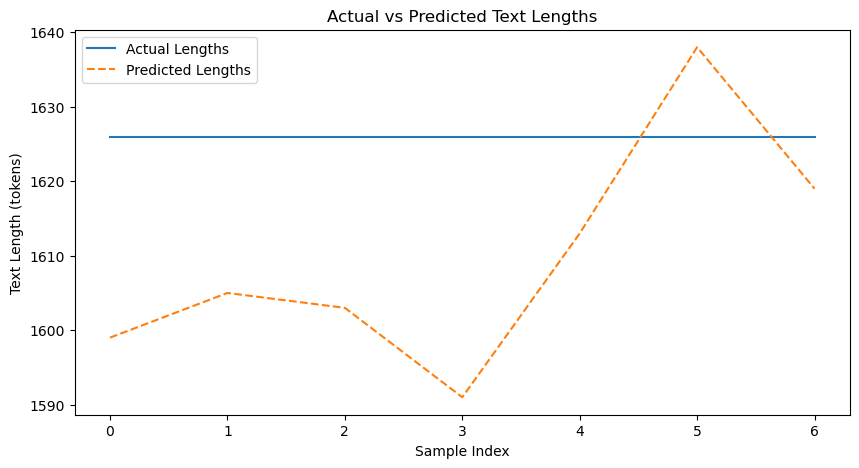

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(actual_lengths, label="Actual Lengths")
plt.plot(predicted_lengths, label="Predicted Lengths", linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Text Length (tokens)")
plt.legend()
plt.title("Actual vs Predicted Text Lengths")
plt.show()